In [260]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from  sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph


df = pd.read_csv('artificial_1.csv' ,parse_dates=["date"])

#df.to_string()
print(df.head())


        date      value  temperature
0 2018-01-01  72.624345          6.0
1 2018-01-02  65.388244         10.0
2 2018-01-03  65.471828         11.0
3 2018-01-04  64.927031          8.0
4 2018-01-05  66.865408         10.0


In [261]:
def evaluatereg(actual,prediction):
    
    return  (mse(actual, prediction), rmse(actual, prediction),r2_score(actual,prediction),np.mean(np.abs((prediction - actual) /np.abs(actual))) * 100) 

In [262]:
from pandas import concat
temps = DataFrame(df.value)
width = 3
window4 = temps.shift(2).expanding()
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max()], axis=1)
dataframe.columns = [ 'min_value', 'mean_value', 'max_value']
temps = DataFrame(df.value)


dates = pd.to_datetime(df.date)
test_df = df.copy()
test_df["year"] = dates.dt.year
test_df["month"] = dates.dt.month
test_df["day"] = dates.dt.day


dataframe3= pd.concat([test_df["year"], test_df["month"],test_df["day"], dataframe.min_value, dataframe.mean_value, dataframe.max_value, window4.min(), window4.mean(), window4.max(), temps.shift(1), temps.shift(2), temps.shift(3),temps.shift(7),temps.shift(8)],axis=1)

dataframe3.columns = [ 'year', 'month', 'day','min_rolling','mean_rolling',  'max_rolling','min_expanding', 'mean_expanding', 'max_expanding','t-1','t-2','t-3','t-7','t-8']

dataframeee=[df,dataframe3]

dataframe2= pd.concat(dataframeee, "columns").dropna()
#seasons
seasonsdataframe=DataFrame()
l=[]
for i in test_df.month.values:
    if i== 6 or 7 or 8:
        l.append('2')
    if i == 3 or 4 or 5:
        l.append('1')
    if i== 9 or 10 or 11:
        l.append('3')
    if i== 12 or 1 or 2:
        l.append('4')
seasonsdataframe = pd.DataFrame(l)
seasonsdataframe.columns= ['seasons']
dataframe2["seasons"]=seasonsdataframe.seasons
#sin cos
dataframe2['sin_month'] = np.sin((dataframe2.month-1)*(2.*np.pi/12))
dataframe2['cos_month'] = np.cos((dataframe2.month-1)*(2.*np.pi/12))

In [263]:
dataf = df.value.copy()
shifted6 = dataf.shift(6)
window7 = shifted6.rolling(7).mean()
shifted7 = dataf.shift(7)
window8= shifted7.rolling(8).mean()
shifted4 = dataf.shift(4)
window5 = shifted4.rolling(5).mean()
shifted3 = dataf.shift(3)
window4= shifted3.rolling(4).mean()
shifted1 = dataf.shift(1)
window2= shifted1.rolling(2).mean()
#shifted8 = dataf.shift(8)
#window9= shifted7.rolling(9).mean()
window7.dropna()
window8.dropna()
window4.dropna()
window5.dropna()
window2.dropna()
#window9.dropna()

dataframe2["rolling7"] = window7
dataframe2["rolling8"] =window8
dataframe2["rolling4"] =window4
dataframe2["rolling5"] =window5
dataframe2["rolling2"] =window2
#dataframe2["rolling9"] =window9
dataframe2 = dataframe2.dropna()
dataframe2.head()

,date,value,temperature,year,month,day,min_rolling,mean_rolling,max_rolling,min_expanding,...,t-7,t-8,seasons,sin_month,cos_month,rolling7,rolling8,rolling4,rolling5,rolling2
14,2018-01-15,72.133769,2.0,2018,1,15,42.939859,44.693183,46.462108,39.238793,...,39.238793,67.744812,3,0.0,1.0,59.037910,63.244865,44.867909,48.703076,44.646764
15,2018-01-16,64.900109,2.0,2018,1,16,42.939859,44.077796,44.677583,39.238793,...,45.319039,39.238793,4,0.0,1.0,56.077739,59.831702,44.707545,43.742086,58.374858
16,2018-01-17,65.827572,7.0,2018,1,17,44.615946,53.809099,72.133769,39.238793,...,44.750630,45.319039,2,0.0,1.0,53.439893,57.252000,44.673874,44.829844,68.516939
17,2018-01-18,65.122142,8.0,2018,1,18,44.615946,60.549941,72.133769,39.238793,...,46.462108,44.750630,1,0.0,1.0,50.021957,54.875785,51.091789,44.689225,65.363840
18,2018-01-19,66.042214,4.0,2018,1,19,64.900109,67.620483,72.133769,39.238793,...,42.939859,46.462108,3,0.0,1.0,47.304689,52.127389,56.581852,50.165853,65.474857


In [264]:
dataframe2copy=dataframe2.copy()
train=dataframe2copy[:-60]
test=dataframe2copy[-60:]
x_train=train.drop(labels=["value","date"],axis=1)
y_train=train["value"]
x_test=test.drop(labels=["value","date"],axis=1)
y_test=test["value"]


In [77]:
#Normalized data

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing dataabs
X_test_norm = norm.transform(x_test)

In [78]:
num_cols=['temperature','year', 'month', 'day','min_rolling','mean_rolling',
          'max_rolling','min_expanding', 'mean_expanding', 'max_expanding',
          't-1','t-2','t-3','t-7','t-8','seasons','sin_month','cos_month',
          'rolling7','rolling8', 'rolling4','rolling5','rolling2']

In [79]:
#Standardized Data
X_train_stand = x_train.copy()
X_test_stand = x_test.copy()

for i in num_cols:
    scale =StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i]=scale.transform(X_train_stand[[i]])
    X_test_stand[i]=scale.transform(X_test_stand[[i]])

In [80]:
trainX = [x_train, X_train_norm,X_train_stand]
testX = [x_test, X_test_norm,X_test_stand]

In [81]:
svr = SVR(kernel='rbf',C=5)
R2 = []
Error = []
for i in range(len(trainX)):
    svr.fit(trainX[i],y_train)
    pred = svr.predict(testX[i])
    R2.append(r2_score(y_test,pred))
    Error.append(rmse(y_test,pred))
rmse_svr = pd.DataFrame({'RMSE':Error},index=['Original','Normalized','Standardized'])

r2_svr = pd.DataFrame({'R2':R2},index=['Original','Normalized','Standardized'])
print(rmse_svr,'\n\n', r2_svr)


                   RMSE
Original      11.577064
Normalized     4.557604
Standardized   4.018658 

                     R2
Original      0.092170
Normalized    0.859304
Standardized  0.890612


In [73]:
params = [{ 'kernel': ('linear','poly', 'rbf', 'sigmoid'),
           'degree': [1,2,3],
           'C':[0.5, 1,5,10],
           'coef0': [0.005, 0.01,0.5,1],
           'gamma': ('scale', 'auto')
    
}]
grid_svr = GridSearchCV(estimator=svr, param_grid=params, scoring='neg_mean_squared_error',
                    cv=3, n_jobs = -1, verbose = 2)
grid_svr.fit(X_train_stand.astype(float), y_train.astype(float))


Fitting 3 folds for each of 384 candidates, totalling 1152 fits


GridSearchCV(cv=3, estimator=SVR(C=5), n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 5, 10], 'coef0': [0.005, 0.01, 0.5, 1],
                          'degree': [1, 2, 3], 'gamma': ('scale', 'auto'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}],
             scoring='neg_mean_squared_error', verbose=2)

In [58]:
grid_svr.best_params_

{'C': 0.5, 'coef0': 0.005, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [320]:
svr = SVR(kernel='linear',C=0.5, gamma = 'scale' ,  coef0 =0.005, degree = 1)    
svr.fit(X_train_stand,y_train)

pred = svr.predict(X_test_stand)
pred_train = svr.predict(X_train_stand)
  

print('Training scores','\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f' %evaluatereg(y_train,pred_train))
print('Test scores,''\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(y_test,pred))


Training scores 
 MSE: 10.654, RMSE: 3.264, R2 score: 0.937, MAPE: 5.119
Test scores,
 MSE: 14.534, RMSE: 3.812, R2 score: 0.902, MAPE: 5.622


In [321]:
svr.coef_

array([[ -1.66409723,   0.12696951,  -0.06850731,  -0.10126658,
         -0.09095368,   0.12932222,  -0.33229382,   0.80824625,
         -0.86614855,   0.        ,   3.82617526,  -0.1807656 ,
          0.02626999, -11.69955675,   3.62496244,   0.13712748,
          0.25075399,   0.05451433,  -0.86892158,   4.35160175,
          2.63015474,   0.05578851,   2.01188803]])

temperature Score: 0.03536
year Score: 0.00002
month Score: -0.00009
day Score: -0.00008
min_rolling Score: 0.00008
mean_rolling Score: 0.00018
max_rolling Score: 0.00155
min_expanding Score: 0.00767
mean_expanding Score: 0.00957
max_expanding Score: 0.00000
t-1 Score: 0.16883
t-2 Score: 0.00043
t-3 Score: 0.00002
t-7 Score: 1.64403
t-8 Score: 0.15281
seasons Score: 0.00029
sin_month Score: 0.00027
cos_month Score: 0.00003
rolling7 Score: 0.01002
rolling8 Score: 0.22238
rolling4 Score: 0.07920
rolling5 Score: -0.00001
rolling2 Score: 0.04598


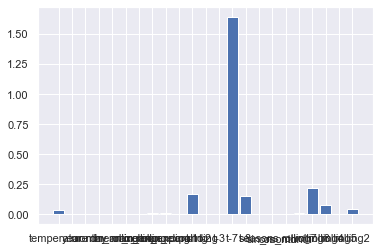

In [322]:
from sklearn.inspection import permutation_importance
sns.set(font_scale = 1)
featureimp = []
results = permutation_importance(svr, X_train_stand, y_train)
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    
    print('%0s Score: %.5f' % (num_cols[i],v))
# plot feature importance
plt.bar(num_cols, importance)
plt.show()


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Energy Values')]

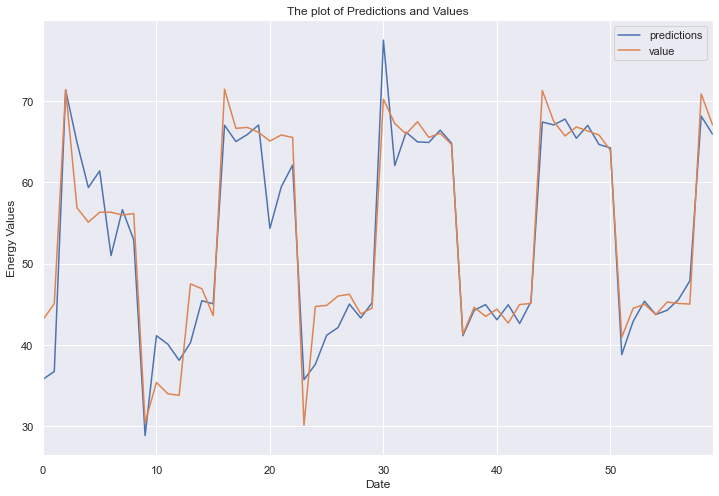

In [324]:
# Plot predictions against known values
title='The plot of Predictions and Values'
ylabel='Energy Values'
xlabel='Date'
legend = "pred"
pred = pd.Series(pred).rename("predictions")
pred.columns = "predictions"
ax = pd.Series(pred).plot(legend=True,figsize=(12,8),title=title)
#plot_y_test=y_test.reset_index()

f = plot_y_test["value"].plot(legend=True,figsize=(12,8),title=title)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


# k-NN

In [211]:
KNNmodel = KNeighborsRegressor(n_neighbors=7)
KNNmodel.fit(X_train_stand,y_train)
knn_pred = KNNmodel.predict(X_test_stand)
evaluatereg(y_test, knn_pred)

(26.100936402780654, 5.108907554730331, 0.8232075807681136, 6.75413234339365)

In [212]:
params = [{ 'n_neighbors': [2,3, 5,7,9],
           'weights': ('uniform', 'distance'),
           'leaf_size': [10,15,20,30,35,40],
       
}]
grid_knn = GridSearchCV(estimator=KNNmodel, param_grid=params, scoring='neg_mean_squared_error',
                    cv=5, n_jobs = -1, verbose = 2)
grid_knn.fit(X_train_stand,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=7), n_jobs=-1,
             param_grid=[{'leaf_size': [10, 15, 20, 30, 35, 40],
                          'n_neighbors': [2, 3, 5, 7, 9],
                          'weights': ('uniform', 'distance')}],
             scoring='neg_mean_squared_error', verbose=2)

In [213]:
grid_knn.best_params_

{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [214]:
KNNmodel = KNeighborsRegressor(n_neighbors=3, leaf_size = 10, weights = 'distance')
KNNmodel.fit(X_train_stand,y_train)
knn_pred = KNNmodel.predict(X_test_stand)
knn_pred_train = KNNmodel.predict(X_train_stand)

print('test score is',evaluatereg(y_test, knn_pred))
print('train score is',evaluatereg(y_train, knn_pred_train))


test score is (13.942212014928925, 3.733927157153568, 0.9055636413373827, 4.98393391186067)
train score is (1.6801074736380865e-14, 1.296189597874511e-07, 0.9999999999999999, 6.889263627654845e-08)


In [215]:
dataframe5 = dataframe2
last_test_x = dataframe5.iloc[-60:].drop(labels=["value","date"],axis=1)
last_train_x = dataframe5.iloc[:-60].drop(labels=["value","date"],axis=1)
last_test_y = dataframe5.iloc[-60:]["value"]
last_train_y = dataframe5.iloc[:-60]["value"]
colss = ['temperature','year', 'month', 'day','min_rolling','mean_rolling',  'max_rolling','min_expanding', 'mean_expanding', 'max_expanding','t-1','t-2','t-3','t-7','t-8','seasons','sin_month','cos_month', 'rolling7','rolling8','rolling4','rolling5','rolling2']
for i in colss:
    scale =StandardScaler().fit(last_train_x[[i]])
    last_train_x[i]=scale.transform(last_train_x[[i]])
    last_test_x[i]=scale.transform(last_test_x[[i]])

In [325]:
KNNmodel_last = KNeighborsRegressor(n_neighbors=3, leaf_size = 10, weights = 'distance')
KNNmodel_last =KNNmodel_last.fit(last_train_x,last_train_y)
knn_pred = KNNmodel_last.predict(last_test_x)
knn_pred_train = KNNmodel.predict(last_train_x)

print('Test scores,''\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(last_test_y, knn_pred))
print('Train scores,''\n','MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f'%evaluatereg(last_train_y, knn_pred_train))

Test scores,
 MSE: 13.942, RMSE: 3.734, R2 score: 0.906, MAPE: 4.984
Train scores,
 MSE: 0.000, RMSE: 0.000, R2 score: 1.000, MAPE: 0.000


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Energy Values')]

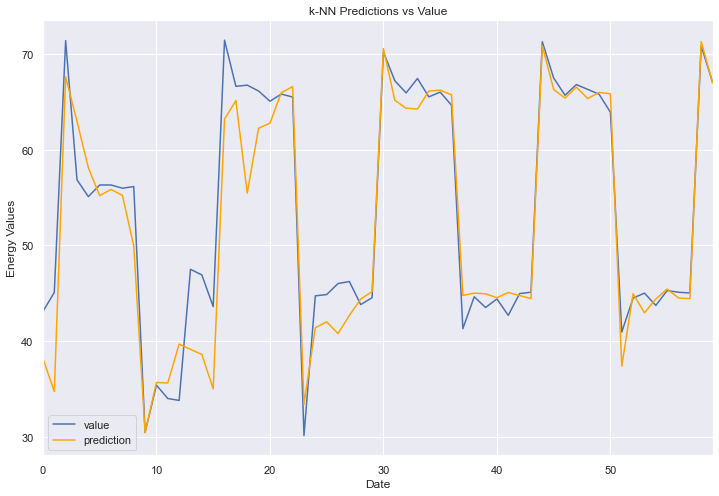

In [318]:
# Plot predictions against known values
title='k-NN Predictions vs Value'
ylabel='Energy Values'
xlabel='Date'
knn_pred =pd.Series(knn_pred).rename("prediction")
#plot_y_test = y_test.reset_index()
ax = plot_y_test["value"].plot(legend=True,figsize=(12,8),title=title)

knn_pred.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
